In [19]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.nn.functional as F
from torch.autograd import Variable
from torchviz import make_dot

In [13]:
class FNN(nn.Module):
    def __init__(self, input_size):
        super(FNN, self).__init__()
        self.l1 = nn.Linear(input_size*2, 5)
        self.relu = nn.ReLU()
        self.l12 = nn.Linear(5, 10)
        self.l2 = nn.Linear(10, 1)

    def forward(self, x):
        out = self.relu(self.l1(x))
        out = self.relu(self.l12(out))
        out = self.relu(self.l2(out))
        return out

class RNN(nn.Module):
    '''
    Inspiration from:
    https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch/notebook

    Module used to create a recurrent neural network. 
    '''
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, batch_size):
        super(RNN, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        self.input_dim = input_dim
        self.batch = batch_size

        # RNN
        self.rnn = nn.RNN(2, hidden_dim, layer_dim,
                          batch_first=True, nonlinearity='relu')

        # fc: fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, self.batch, self.hidden_dim))

        # One time step
        out, hn = self.rnn(x, h0)

        # Since RNN has different structure it only uses the last
        # entrance of the sequence length for the output hence [:, -1, :]
        out = self.fc(out[:, -1, :])
        return out

In [14]:
data = torch.rand(10,4,2)
labs = torch.rand(10)
learning_rate = 0.001

In [17]:
model = RNN(len(data[0]), hidden_dim=len(data[0]), layer_dim=3,
            output_dim=10, batch_size=10)
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Train:
sample = data#.reshape(len(data), -1)
labels = labs.view(labs.shape[0], 1)

# forward
output = model(sample)
loss = loss_func(output, labels)

# backward
optimizer.zero_grad()
loss.backward()
optimizer.step()

/Users/jakobolsen/uni_python/lib/python3.10/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [18]:
make_dot(output, params=dict(list(model.named_parameters()))).render("simple_RNN3_test", format="png")

'simple_RNN3_test.png'

In [20]:
import numpy as np
import data_gen1

data = np.zeros((3500,50,2))
lab = np.zeros(3500)
path = "data/"
files = [
    "(500,50,2)_xvar-0.1-10_yvar-0.1-10.npy",
    "(500,50,2)_xvar-0.05-10_yvar-0.05-20.npy",
    "(500,50,2)_xvar-0.05-10_yvar-0.05-100.npy",
    "(500,50,2)_xvar-0.05-20_yvar-0.05-10.npy",
    "(500,50,2)_xvar-0.05-100_yvar-0.05-10.npy",
    "(500,50,2)_xvar-0.05-100_yvar-0.05-100.npy",
    "(500,50,2)_xvar-0.1-100_yvar-0.05-0.1.npy"
]
i0 = 0
i1 = 500
for name in files:
    data_loaded, labels_loaded = data_gen1.load_data(path+name)
    data[i0:i1] = data_loaded
    lab[i0:i1] = labels_loaded

    i0 += 500
    i1 += 500

# shuffle
idx = np.random.choice(len(lab), len(lab), replace=False)
data = data[idx]
lab = lab[idx]

#data_gen1.save_data(path+'data_concat2', data, lab)


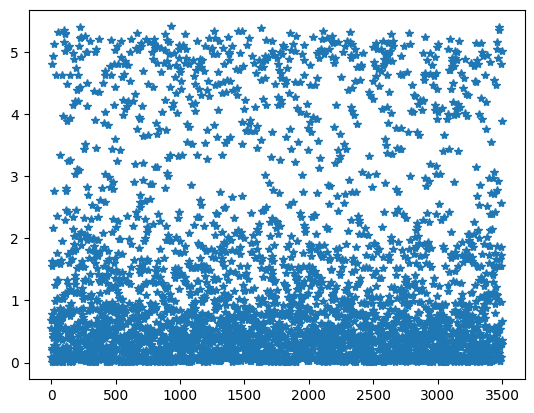

In [21]:
import matplotlib.pyplot as plt

plt.plot(lab, '*')

(array([559., 289., 255., 278., 222., 182., 139., 154., 106.,  85.,  69.,
         67.,  63.,  48.,  68.,  61.,  56.,  49.,  38.,  31.,  26.,  28.,
         24.,  17.,  10.,  19.,  16.,  12.,  11.,   9.,  17.,  17.,  11.,
         12.,  20.,  13.,  16.,  27.,  25.,  20.,  22.,  31.,  29.,  27.,
         46.,  43.,  48.,  44.,  26.,  15.]),
 array([7.57214910e-04, 1.09045871e-01, 2.17334528e-01, 3.25623184e-01,
        4.33911840e-01, 5.42200496e-01, 6.50489153e-01, 7.58777809e-01,
        8.67066465e-01, 9.75355122e-01, 1.08364378e+00, 1.19193243e+00,
        1.30022109e+00, 1.40850975e+00, 1.51679840e+00, 1.62508706e+00,
        1.73337572e+00, 1.84166437e+00, 1.94995303e+00, 2.05824168e+00,
        2.16653034e+00, 2.27481900e+00, 2.38310765e+00, 2.49139631e+00,
        2.59968497e+00, 2.70797362e+00, 2.81626228e+00, 2.92455093e+00,
        3.03283959e+00, 3.14112825e+00, 3.24941690e+00, 3.35770556e+00,
        3.46599422e+00, 3.57428287e+00, 3.68257153e+00, 3.79086019e+00,
        3.

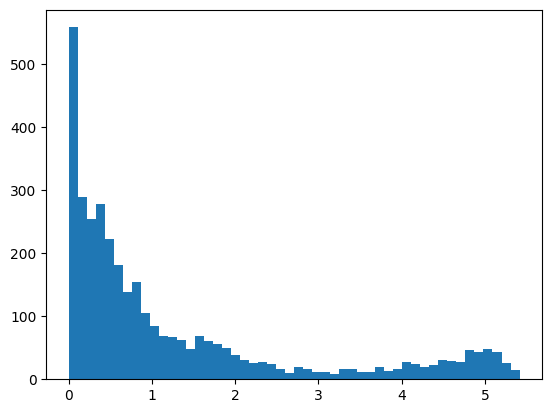

In [23]:
plt.hist(lab, bins=50)